In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
REDUCED_DATA_PATH = "data/data_reduced.csv"
PROCESSED_DATA_PATH = "data/data_processed.csv"

In [24]:
df = pd.read_csv(INPUT_PATH)

C:\Temp\ipykernel_18536\3451356829.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(INPUT_PATH)


**Analyse des données avant le preprocessing**

In [35]:
def has_mixed_types(series):
    # Drop NaN values and check if there are multiple types
    non_nan = series.dropna()
    return non_nan.apply(type).nunique() > 1

# Identify columns with mixed types
mixed_type_columns = df.columns[df.apply(has_mixed_types)]

# Inspect the types within those columns
for col in mixed_type_columns:
    print(f"Column '{col}' has mixed types:")
    # Drop NaN values and count the occurrences of each type
    non_nan_types = df[col].dropna().apply(type)
    print(non_nan_types.value_counts())
    print()

In [36]:
mixed_type_columns

Index([], dtype='object')

In [26]:
df.isna().sum()

Country                       0
Mk                          388
Cn                          375
Mt                        20418
Ewltp (g/km)               9764
Ft                            0
ec (cm3)                     25
ep (KW)                       0
IT                      1752445
Date of registration       2078
Fuel consumption         327082
ech                     4705858
dtype: int64

**Emissions par type de carburant**

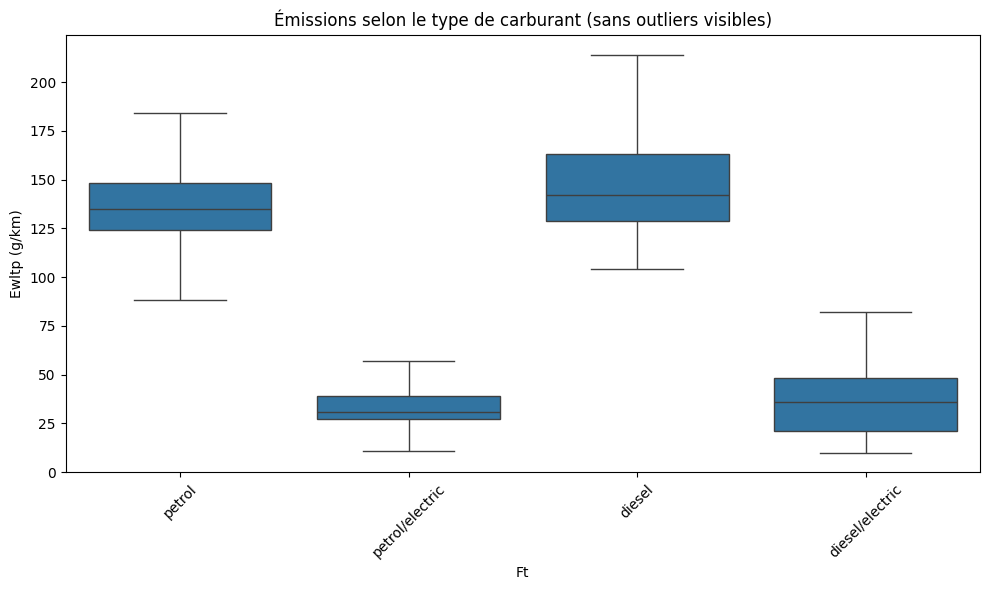

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ft', y='Ewltp (g/km)', showfliers=False)

plt.title(f'Émissions selon le type de carburant (sans outliers visibles)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

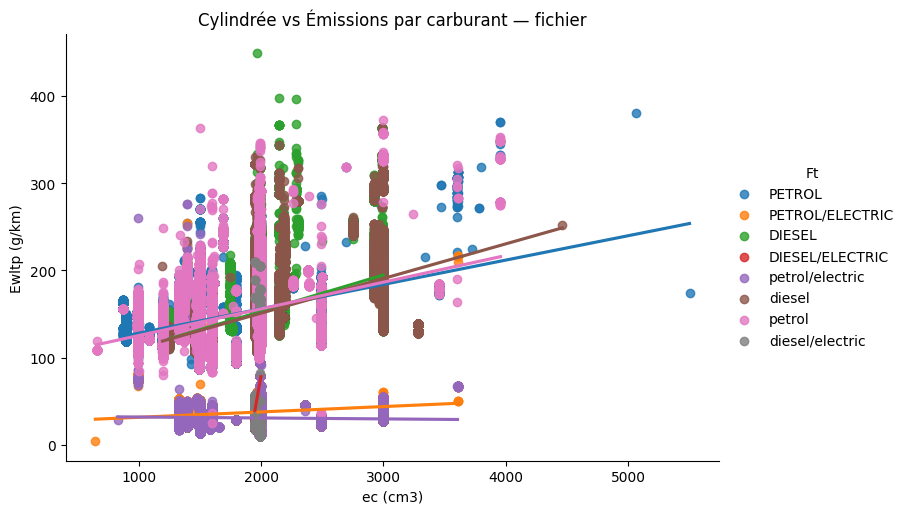

In [8]:
sns.lmplot(data=df, x='ec (cm3)', y='Ewltp (g/km)', hue='Ft', aspect=1.5)
plt.title(f'Cylindrée vs Émissions par carburant')
plt.show()

**Emissions par normes environnementales**

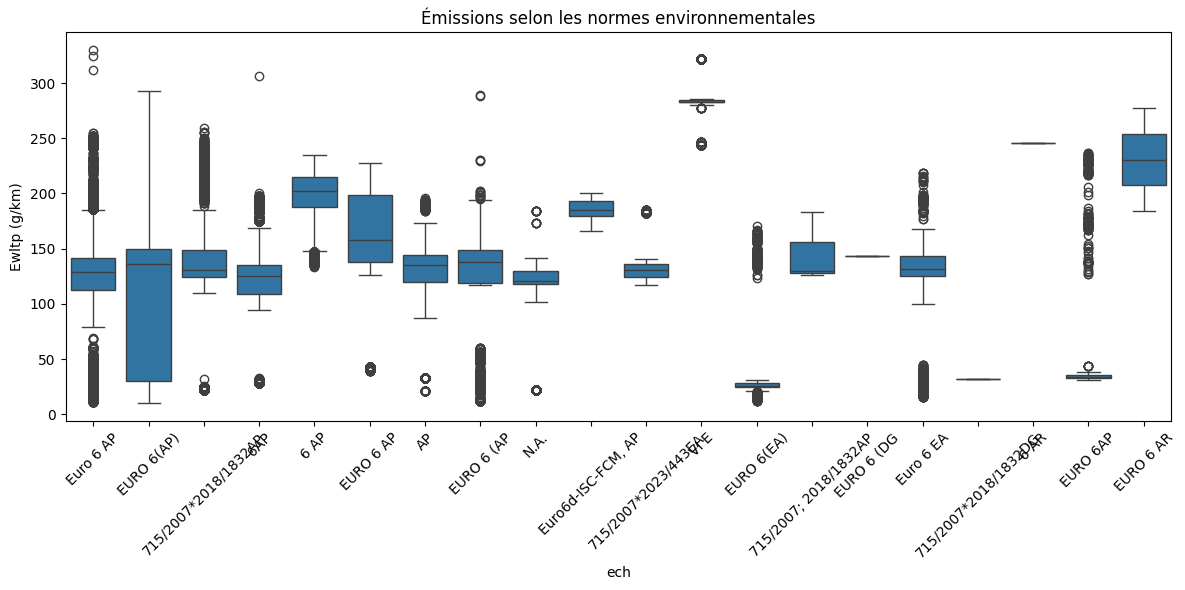

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ech', y='Ewltp (g/km)')
plt.xticks(rotation=45)
plt.title(f'Émissions selon les normes environnementales')
plt.tight_layout()
plt.show()

**Emissions en fonction de la puissance spécifique**

c:\Local\datascientest\co2\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


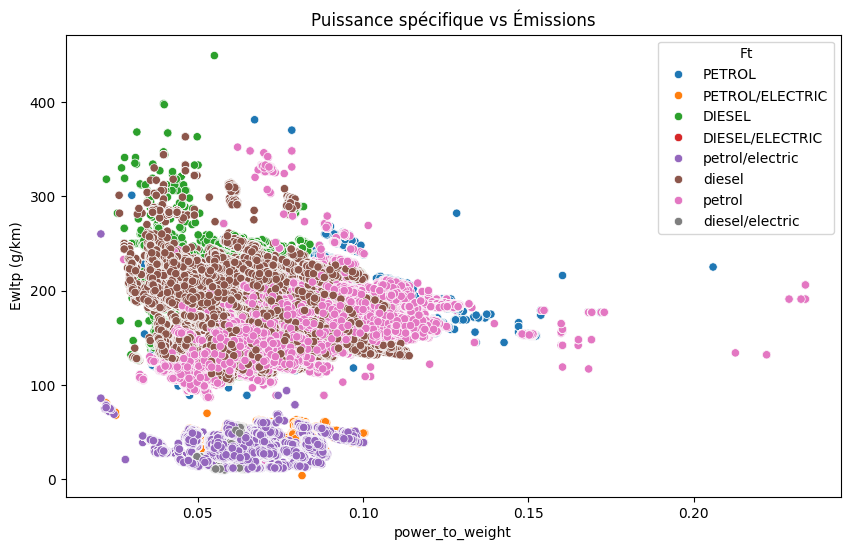

In [10]:
# Calcul de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='power_to_weight', y='Ewltp (g/km)', hue='Ft')
plt.title(f'Puissance spécifique vs Émissions')
plt.show()

**Analyse des émissions par véhicules et marques**

In [16]:
top5_polluants = df.sort_values(by='Ewltp (g/km)', ascending=False).head(5)
top5_sobres = df.sort_values(by='Ewltp (g/km)', ascending=True).head(5)
print("Top 5 véhicules les plus émetteurs :")
print(top5_polluants[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])
print("\nTop 5 véhicules les plus sobres :")
print(top5_sobres[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])

Top 5 véhicules les plus émetteurs :
                            Mk               Cn  Ewltp (g/km)      Ft
534483          VOLKSWAGEN, VW            T-ROC         449.0  DIESEL
28149            MERCEDES-BENZ         SPRINTER         398.0  DIESEL
677000                    FIAT      FIAT DUCATO         397.0  DIESEL
746918              KOENIGSEGG           REGERA         381.0  PETROL
2218205  INEOS AUTOMOTIVE GMBH  INEOS GRENADIER         373.0  petrol

Top 5 véhicules les plus sobres :
                    Mk                 Cn  Ewltp (g/km)               Ft
139467           BMW i                 i3           4.0  PETROL/ELECTRIC
5505718  MERCEDES-BENZ  GLC 300 DE 4MATIC          10.0  diesel/electric
5153954  MERCEDES-BENZ  GLC 300 DE 4MATIC          10.0  diesel/electric
3990694  MERCEDES-BENZ  GLC 300 DE 4MATIC          10.0  diesel/electric
4763880  MERCEDES-BENZ  GLC 300 DE 4MATIC          10.0  diesel/electric


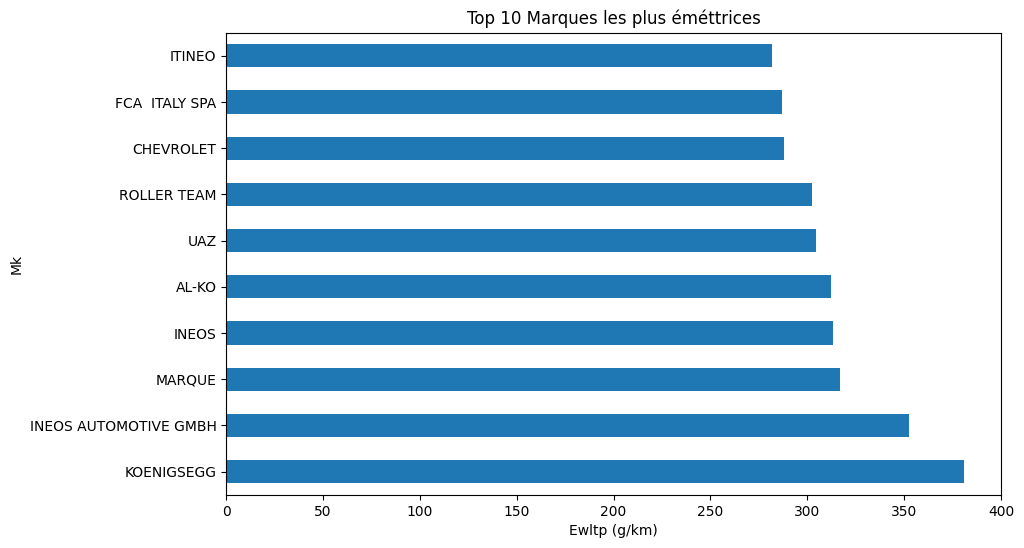

In [11]:
mean_emissions_by_brand = df.groupby('Mk')['Ewltp (g/km)'].mean()
mean_emissions_by_brand.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6), title=f'Top 10 Marques les plus éméttrices')
plt.xlabel('Ewltp (g/km)')
plt.show()

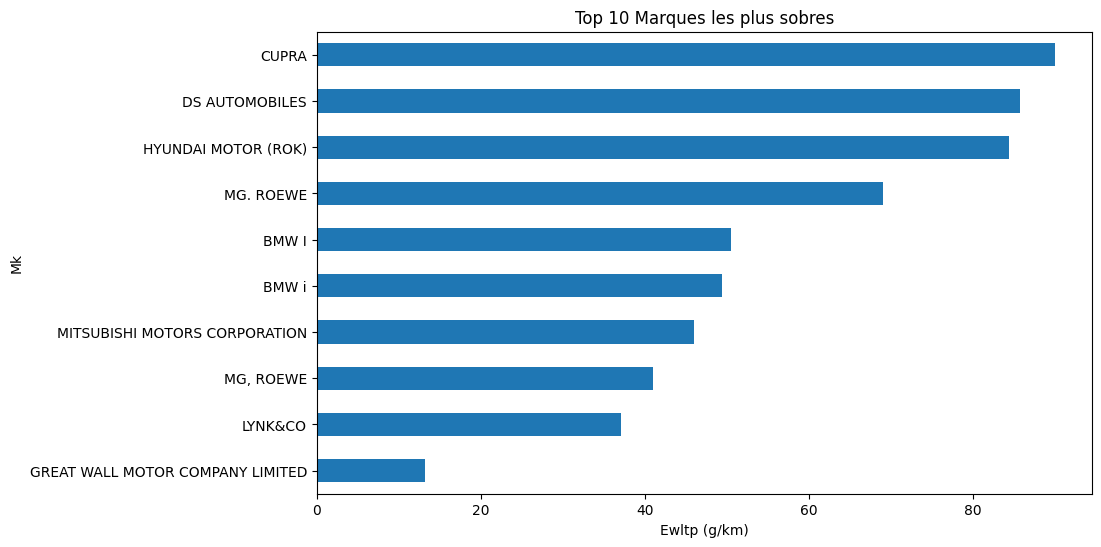

In [12]:
mean_emissions_by_brand = df.groupby('Mk')['Ewltp (g/km)'].mean()
mean_emissions_by_brand.sort_values(ascending=True).head(10).plot(kind='barh', figsize=(10, 6), title=f'Top 10 Marques les plus sobres')
plt.xlabel('Ewltp (g/km)')
plt.show()

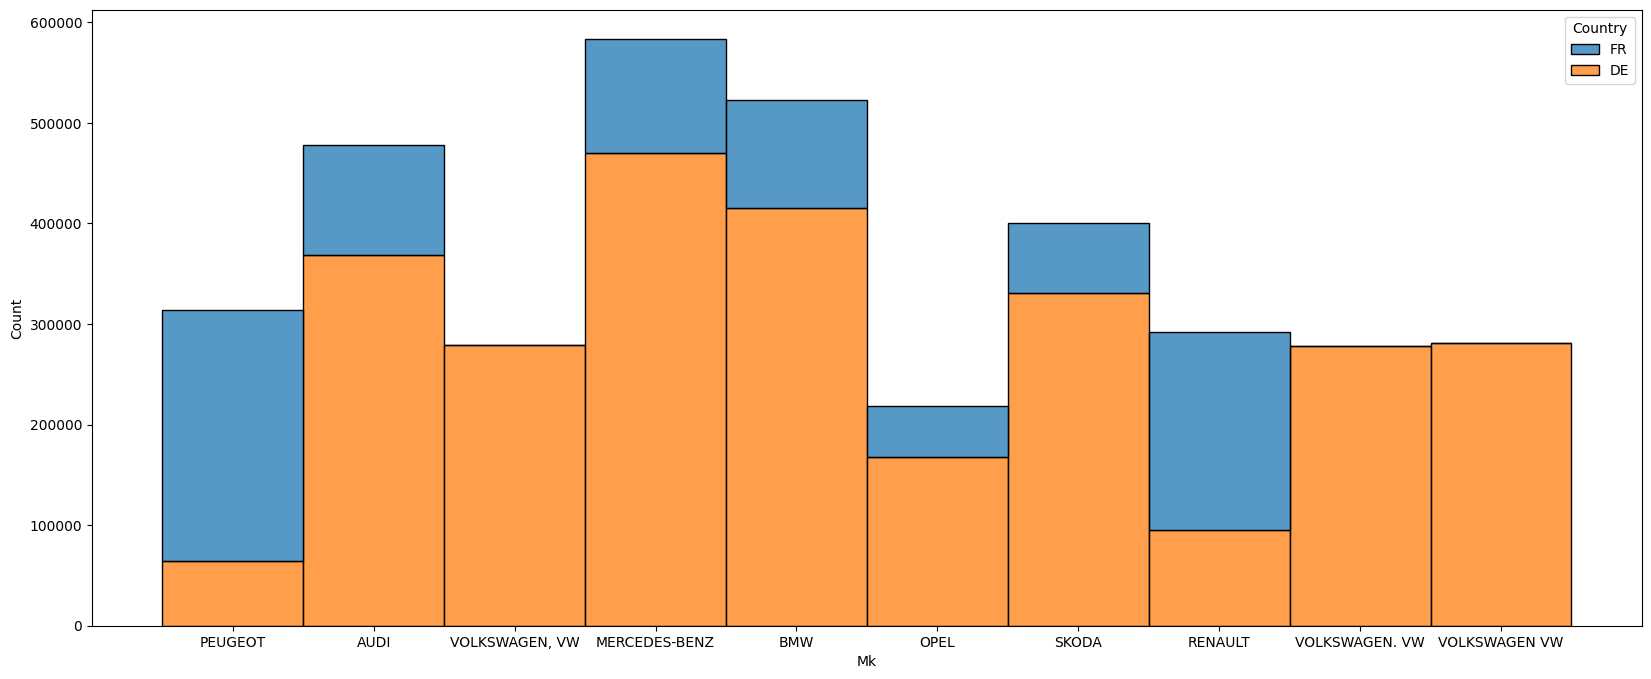

In [40]:
gb = df.groupby('Mk').agg(nb_cars=('Mk', 'count')).sort_values(by='nb_cars', ascending=False).reset_index().head(10)


plt.figure(figsize=(20, 8))
sns.histplot(data=df[df['Mk'].isin(gb['Mk'].unique())], x='Mk', hue='Country', multiple="stack");

**Emissions en fonction de la consommation**

c:\Local\datascientest\co2\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


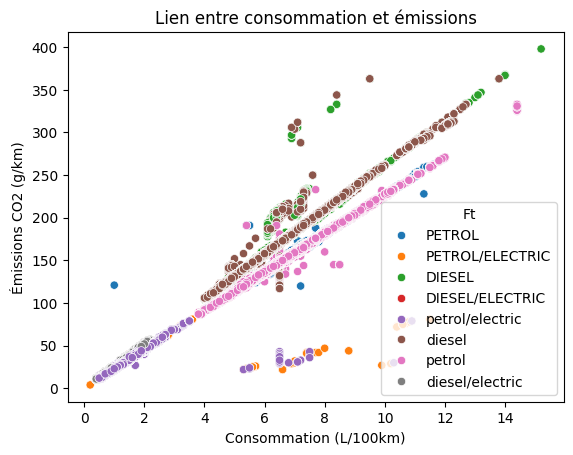

In [ ]:
sns.scatterplot(data=df, 
                x='Fuel consumption', 
                y='Ewltp (g/km)', 
                hue='Ft')

plt.title(f'Lien entre consommation et émissions')
plt.xlabel('Consommation (L/100km)')
plt.ylabel('Émissions CO2 (g/km)')
plt.show()

**Evolution par mois et par pays**

In [17]:
df["Date of registration"] = pd.to_datetime(df["Date of registration"])

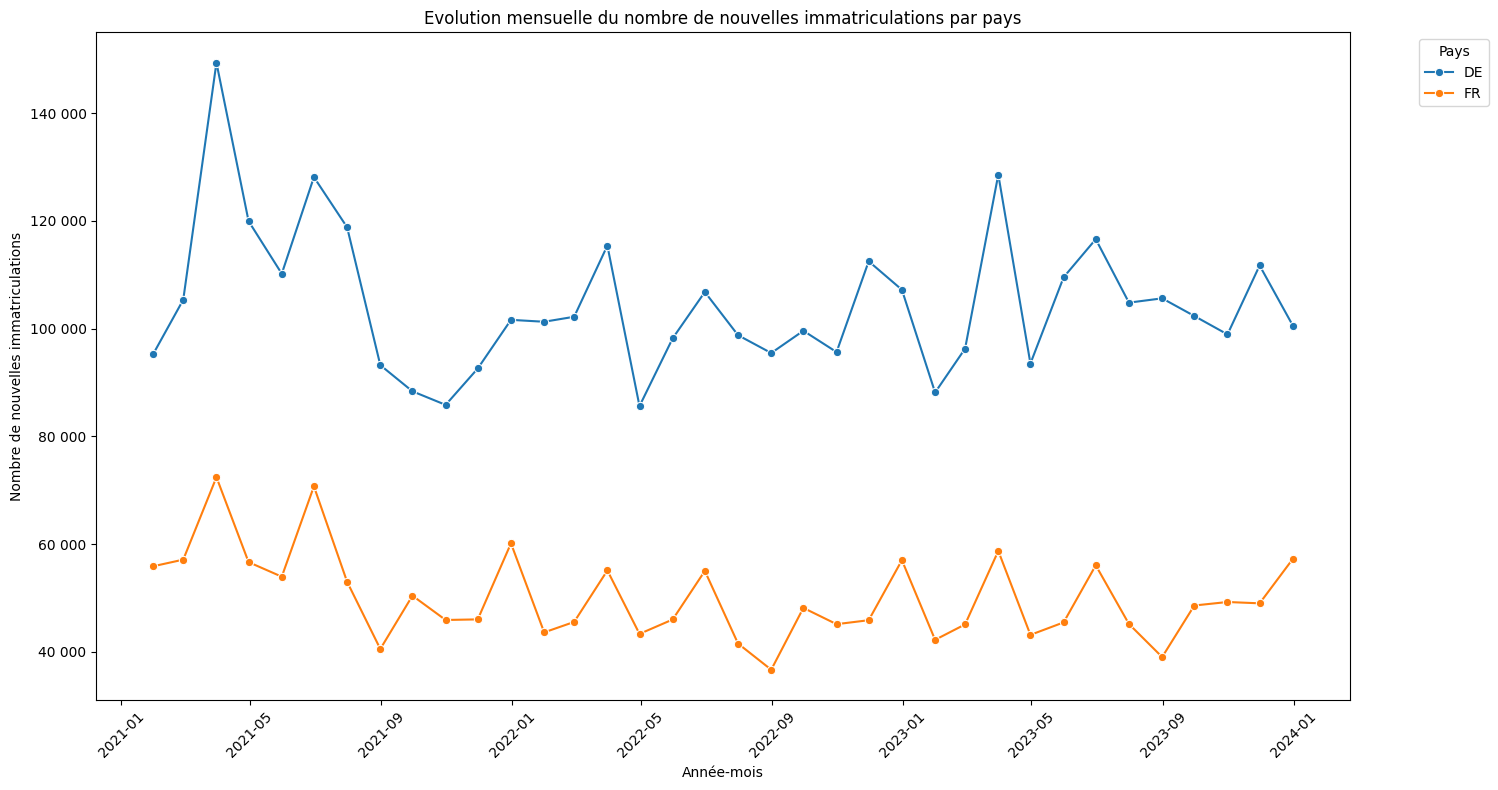

In [21]:
from matplotlib.ticker import FuncFormatter

# Pour formatter les nombres avec un espace en séparateur de millier
format_spaces = lambda x, pos: format(int(round(x)), ',d').replace(',', ' ')


count_country = df.groupby([
    "Country",
    pd.Grouper(key="Date of registration", freq="ME")
]).size().reset_index(name="count")

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=count_country,
    x="Date of registration",
    y="count",
    hue="Country",
    marker='o'
)

plt.title('Evolution mensuelle du nombre de nouvelles immatriculations par pays')
plt.xlabel('Année-mois')
plt.ylabel('Nombre de nouvelles immatriculations')
plt.xticks(rotation=45)
plt.legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Applique le format à y-axis
ax = plt.gca() 
ax.yaxis.set_major_formatter(FuncFormatter(format_spaces))

plt.show()

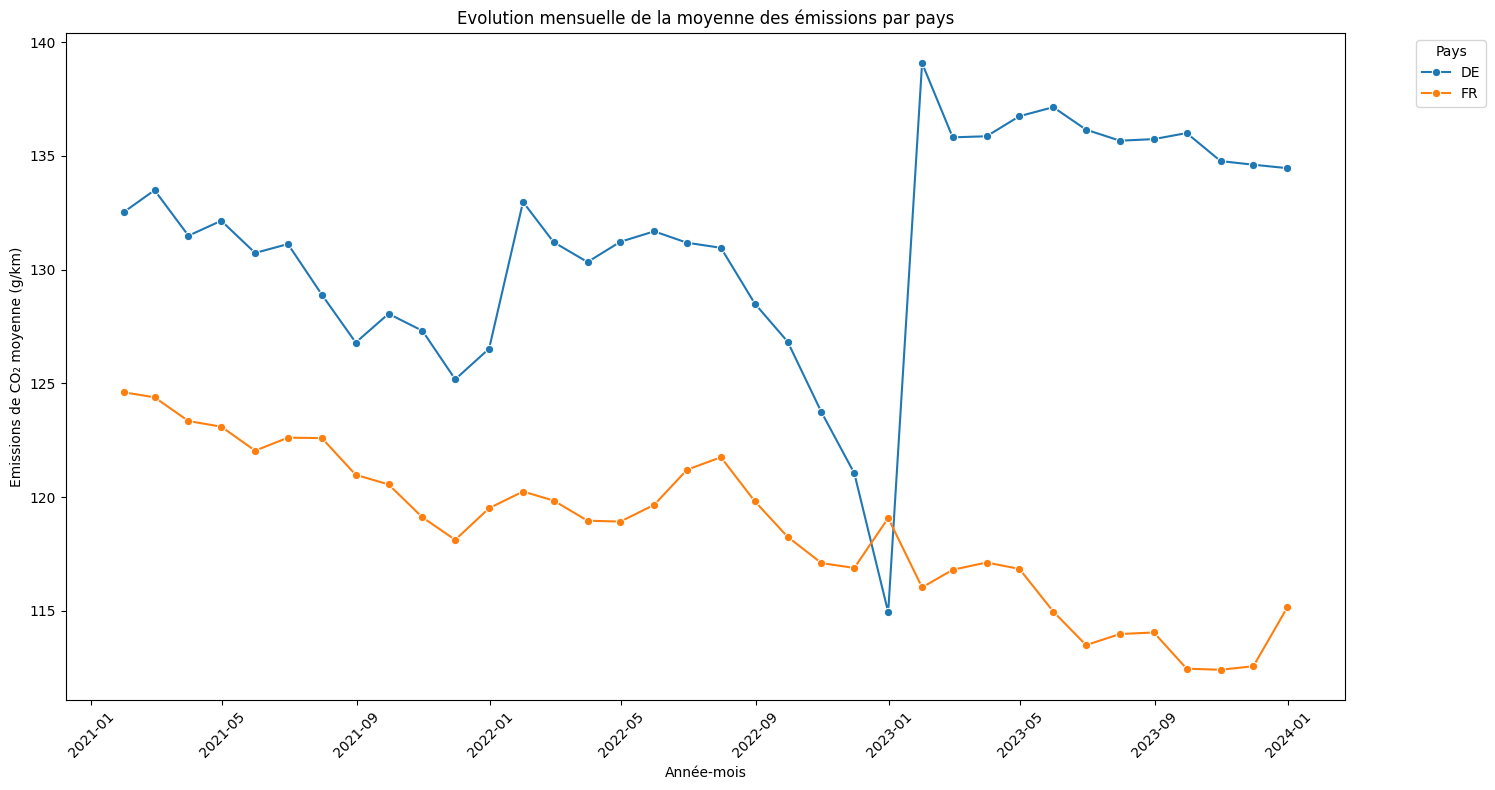

In [22]:
monthly_country_mean = df.groupby(
    ['Country', pd.Grouper(key="Date of registration", freq="ME")]
)['Ewltp (g/km)'].mean().reset_index(name='Mean_Ewltp')

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=monthly_country_mean,
    x='Date of registration',
    y='Mean_Ewltp',
    hue='Country',
    marker='o'
)

plt.title('Evolution mensuelle de la moyenne des émissions par pays')
plt.xlabel('Année-mois')
plt.ylabel('Emissions de CO₂ moyenne (g/km)')
plt.xticks(rotation=45)
plt.legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Matrice de corrélation**

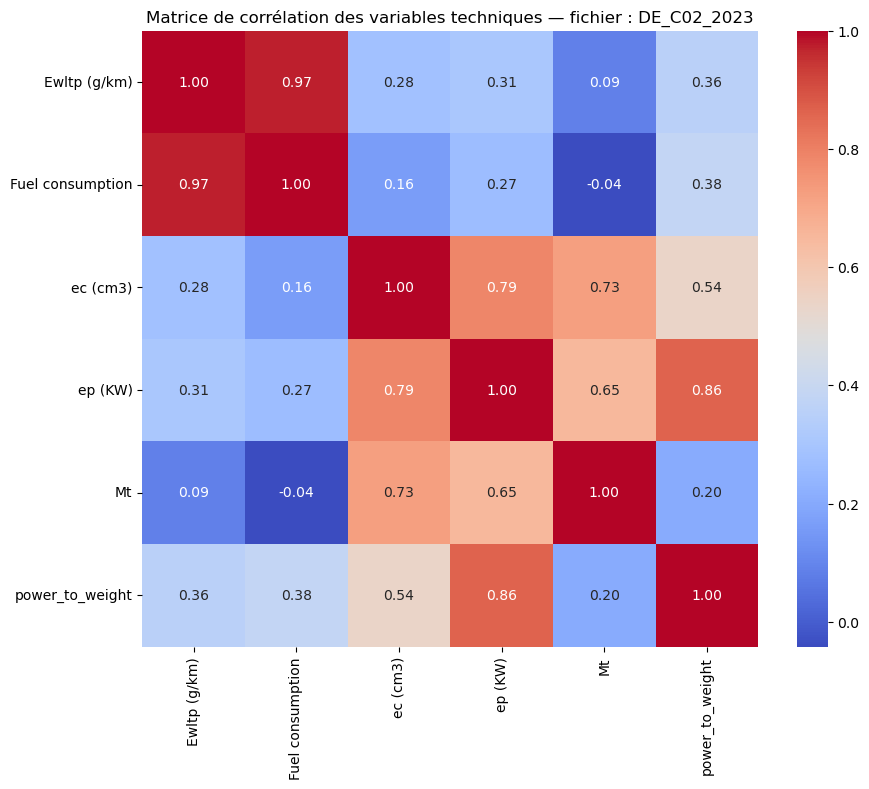

In [ ]:
# Ajout de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']

# Sélection des colonnes à corréler
colonnes_corr = ['Ewltp (g/km)', 'Fuel consumption', 'ec (cm3)', 'ep (KW)', 'Mt', 'power_to_weight']
df_no_outliers_corr = df[colonnes_corr].copy()

# Calcul de la matrice de corrélation
correlation_matrix = df_no_outliers_corr.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title(f"Matrice de corrélation des variables techniques")
plt.show()